In [87]:
# loading the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
# Data Loading
df = pd.read_csv('/Users/yeshwantsp/Documents/RIT/AD1/traffic_violaions.csv')
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [89]:
df.shape

(52966, 15)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


In [91]:
df.drop(columns=['country_name'])

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52961,10/5/2011,1:55,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52962,10/5/2011,6:43,M,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
52963,10/5/2011,6:49,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52964,10/5/2011,7:19,F,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### Exploratory Data Analysis

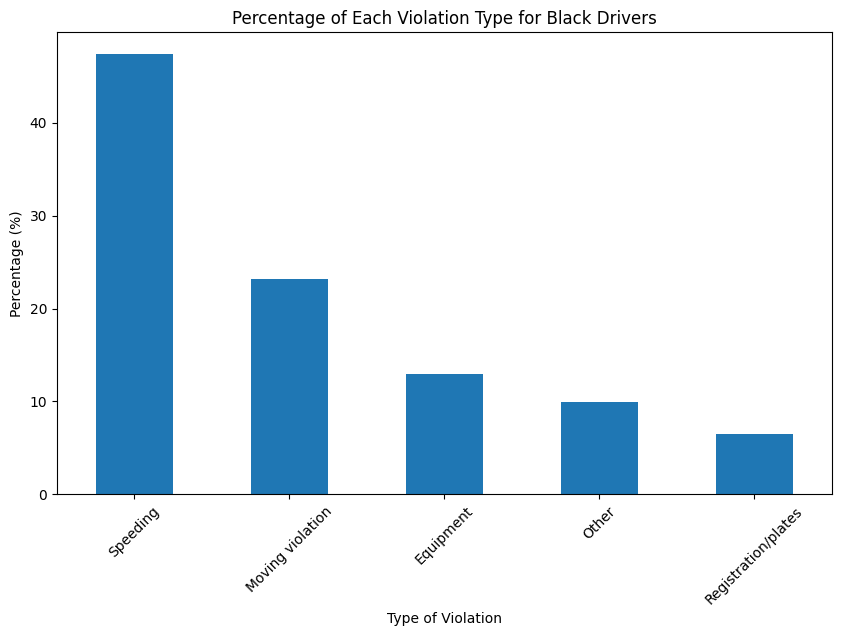

In [92]:

black_violations = df[df['driver_race'] == 'Black']

# Count the occurrences of each violation type
violation_counts = black_violations['violation'].value_counts()

# Calculate the percentages
violation_percentages = (violation_counts / violation_counts.sum()) * 100


plt.figure(figsize=(10, 6))
violation_percentages.plot(kind='bar')
plt.title('Percentage of Each Violation Type for Black Drivers')
plt.xlabel('Type of Violation')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()



The plot indicates that black drivers are more frequently pulled over for speeding violations.

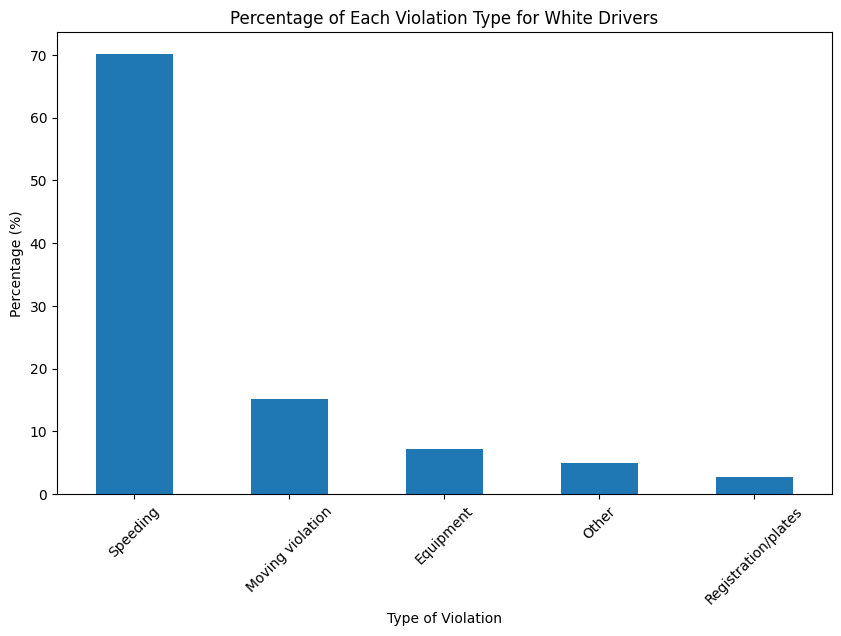

In [93]:

white_violations = df[df['driver_race'] == 'White']

# Count the occurrences of each violation type
violation_counts = white_violations['violation'].value_counts()

# Calculating the percentages
violation_percentages = (violation_counts / violation_counts.sum()) * 100

plt.figure(figsize=(10, 6))
violation_percentages.plot(kind='bar')
plt.title('Percentage of Each Violation Type for White Drivers')
plt.xlabel('Type of Violation')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()


The plot indicates that white drivers are also frequently pulled over for speeding violations.

In comparison to the white drivers, black drivers are stopped more often in other categories.

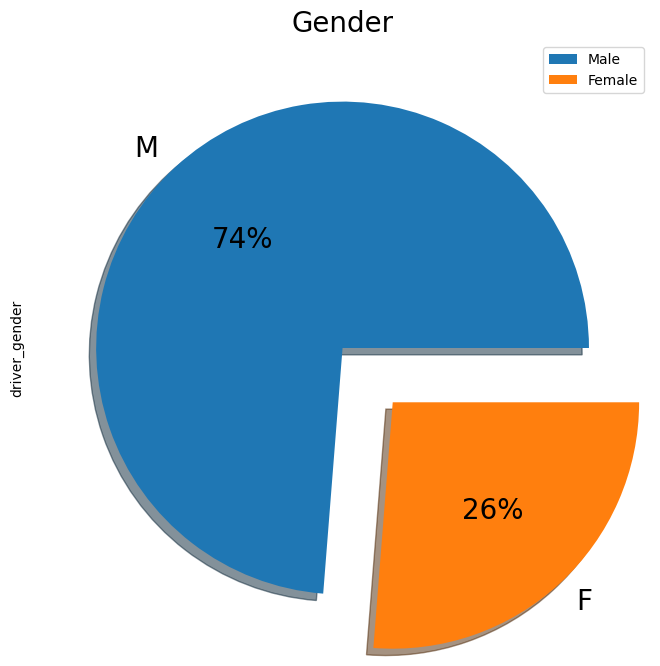

In [94]:
# Gender plot

gender=df.driver_gender.value_counts()
gender
fig = plt.figure(figsize =(10, 8))
gender.plot(kind='pie',textprops={'fontsize': 20},
 autopct='%1.0f%%',explode=(0,0.3),shadow=True,)
plt.title('Gender' ,size=20)
plt.legend(['Male',"Female"])

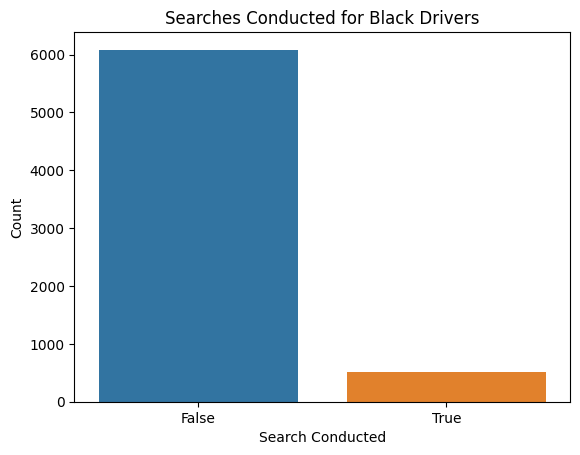

In [95]:
# black drivers search

black_drivers = df[df['driver_race'] == 'Black']

sns.countplot(x='search_conducted', data=black_drivers)

plt.xlabel('Search Conducted')
plt.ylabel('Count')
plt.title('Searches Conducted for Black Drivers')
plt.show()


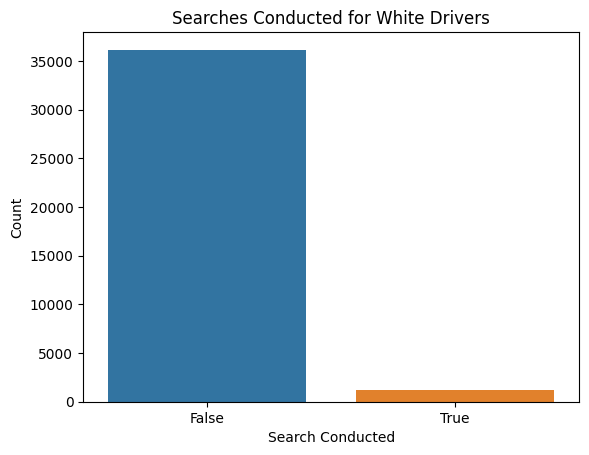

In [96]:

# Filter the DataFrame for white drivers
white_drivers = df[df['driver_race'] == 'White']

sns.countplot(x='search_conducted', data=white_drivers)

plt.xlabel('Search Conducted')
plt.ylabel('Count')
plt.title('Searches Conducted for White Drivers')
plt.show()


In [97]:

white_drivers = df[df['driver_race'] == 'White']

# Count the number of searches conducted
searches_conducted_count = white_drivers['search_conducted'].sum()

print("Percentage of searches conducted for white drivers:", searches_conducted_count/len(white_drivers)*100)


Percentage of searches conducted for white drivers: 3.225029440102773


In [98]:

black_drivers = df[df['driver_race'] == 'Black']

# Count the number of searches conducted
searches_conducted_count = black_drivers['search_conducted'].sum()

print("Percentage of searches conducted for black drivers:", searches_conducted_count/len(black_drivers) * 100)


Percentage of searches conducted for black drivers: 7.734303912647862


The percentage of search conducted for black drivers is relatively higher than that of white drivers 

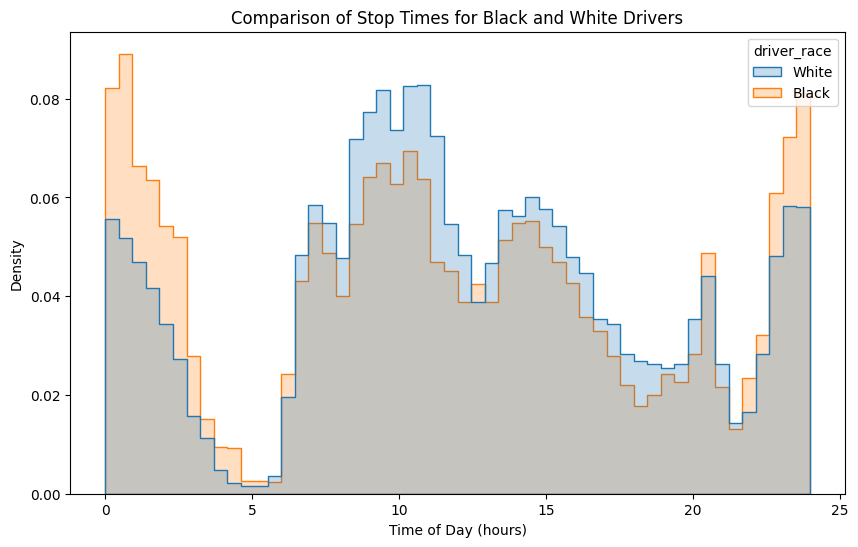

In [99]:

# Converting stop_time to a numerical format (hours)
def convert_time_to_hours(time_str):
    if pd.isna(time_str):
        return None
    hour, minute = map(int, time_str.split(':'))
    return hour + minute / 60

df['stop_time_hours'] = df['stop_time'].apply(convert_time_to_hours)


filtered_drivers = df[df['driver_race'].isin(['Black', 'White'])]

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_drivers, x='stop_time_hours', hue='driver_race', element='step', stat='density', common_norm=False)

plt.xlabel('Time of Day (hours)')
plt.ylabel('Density')
plt.title('Comparison of Stop Times for Black and White Drivers')
plt.show()


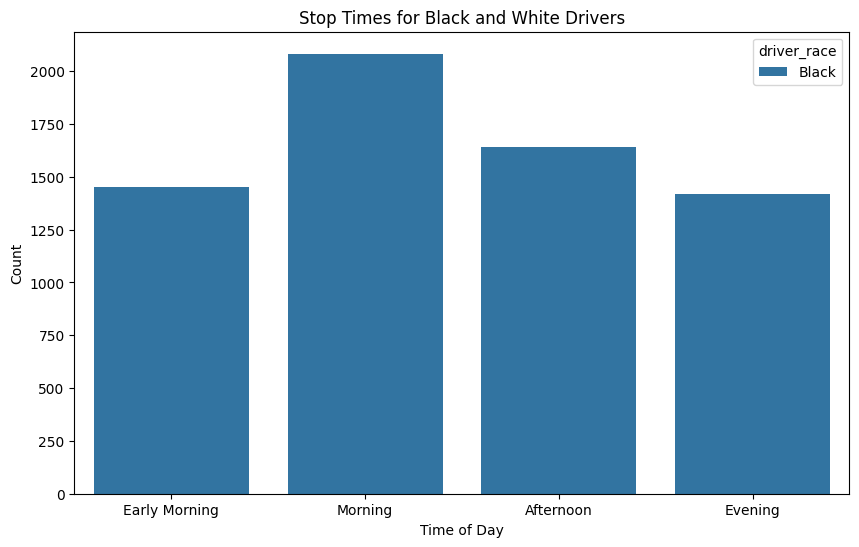

In [100]:

def categorize_time(time_str):
    if pd.isna(time_str):
        return None
    hour, _ = map(int, time_str.split(':'))
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['time_of_day'] = df['stop_time'].apply(categorize_time)


filtered_drivers = df[df['driver_race'].isin(['Black'])]

plt.figure(figsize=(10, 6))
sns.countplot(x='time_of_day', hue='driver_race', data=filtered_drivers, order=['Early Morning', 'Morning', 'Afternoon', 'Evening'])


plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.title('Stop Times for Black and White Drivers')
plt.show()


From the above plot, it can be inferred that black drivers are likely to be pulled over during the day time proving the veil of darkness hypothesis.